In [ ]:
### Movie Analysis - Looking at correlations between numerical and categorical features ###

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [12]:
# Read in data
df = pd.read_csv(r'/Users/abbystokes/Desktop/PythonData/movies.csv')

# Look at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [27]:
# Data Cleaning

#Remove rows with missing data
df = df.dropna()

# Look for missing data 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
    


name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [28]:
#Data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [39]:
#Get rid of trailing 0s

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

#Match year to released by extracting from released column
df['year_released'] = df['released'].astype(str).str.extract(', (.{,4})')




,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [40]:
#Sort by gross product

df.sort_values(by=["gross"], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [94]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,0


<AxesSubplot:>

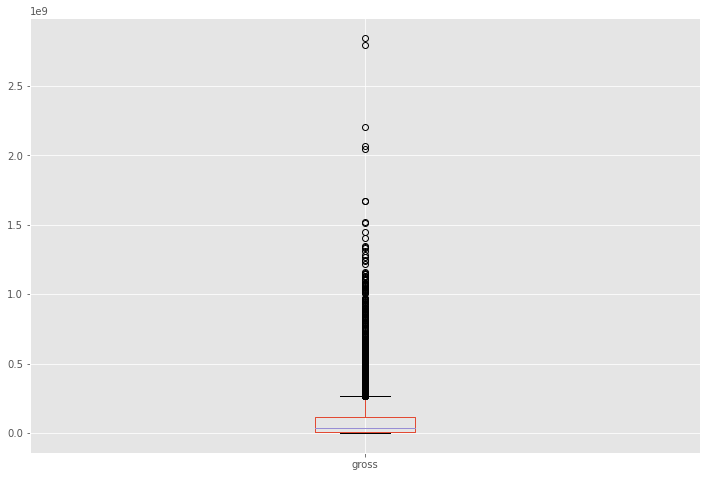

In [46]:
# Check for outliers in terms of gross

df.boxplot(column=['gross'])

In [92]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,0


Text(0, 0.5, 'Budget')

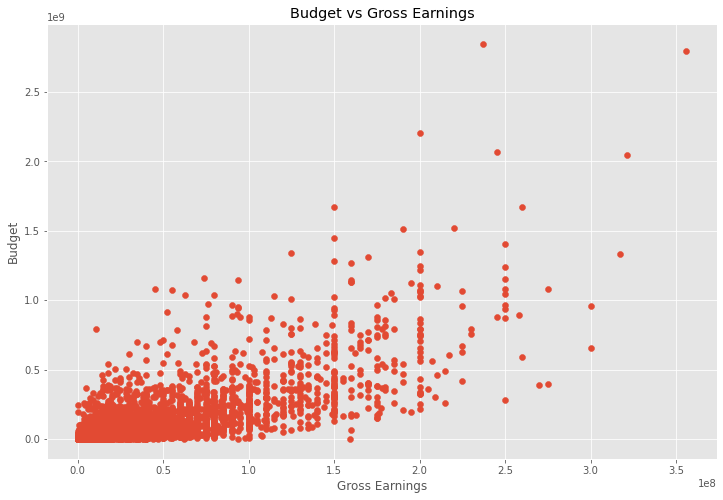

In [56]:
# Initial scatter plot between budget and gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget")

[Text(0.5, 1.0, 'Budget vs. Gross')]

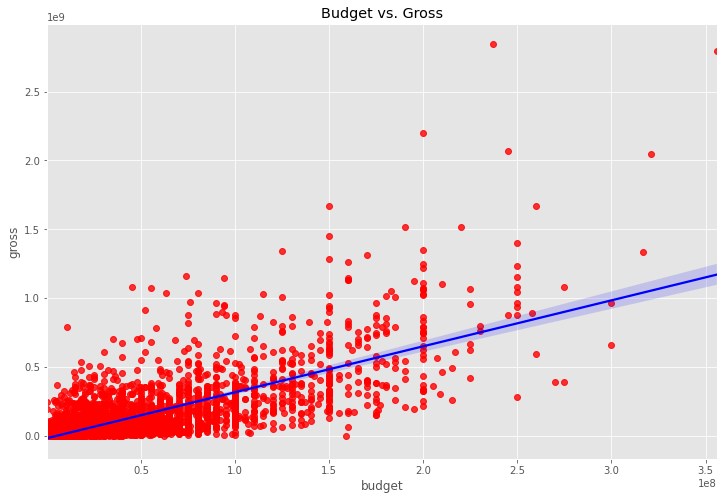

In [66]:
#Scatter with linear regression model fit
plot = sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})
plot.set(title = "Budget vs. Gross")

[Text(0.5, 1.0, 'Score vs. Gross')]

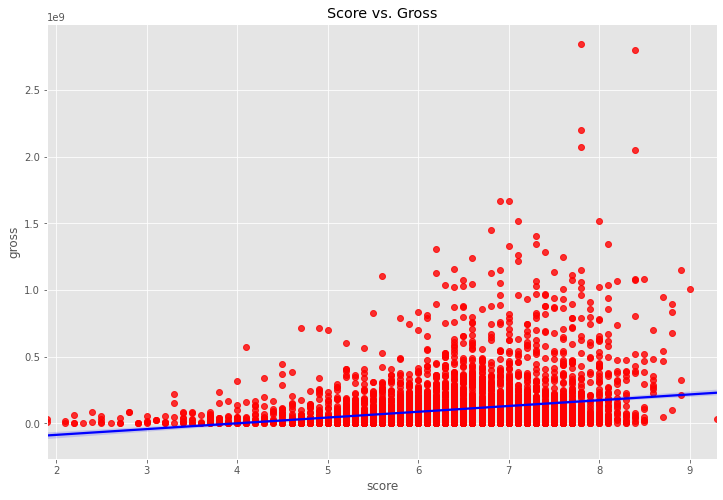

In [65]:
plot = sns.regplot(x="score", y="gross", data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})
plot.set(title = "Score vs. Gross")

Text(87.0, 0.5, 'Movie Features')

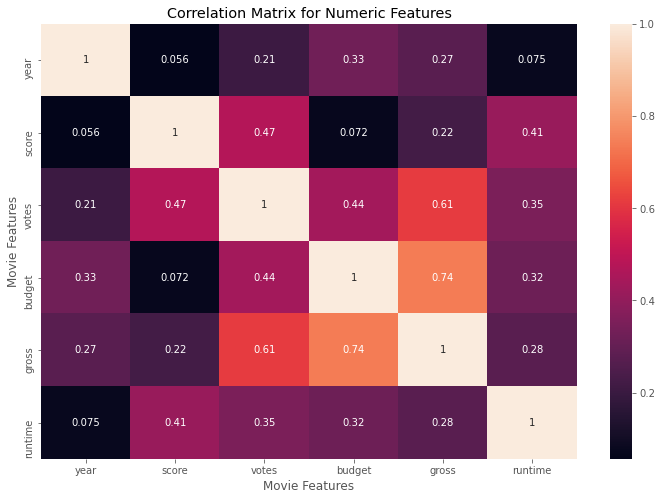

In [77]:
#Make heat map of correlation coefficient matrix - only on numerical fields, 
#Pearson by default, could also try Kendall, Spearman

correlation_matrix= df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [95]:
# Looking at correlations between non numerical fields - assign score

df_numerized = df

#categorizing data, assigning random number to codes 
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,0


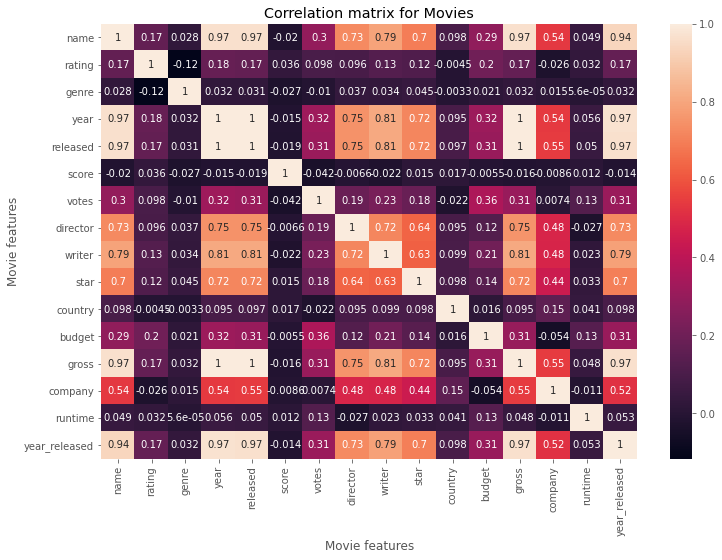

In [81]:
#Other method: use factorize

# This assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()



In [96]:
#Stacked matrix

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

#Sort pairs in ascending order

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)



rating         genre           -0.116507
genre          rating          -0.116507
company        budget          -0.053573
budget         company         -0.053573
votes          score           -0.041981
score          votes           -0.041981
genre          score           -0.027402
score          genre           -0.027402
runtime        director        -0.026918
director       runtime         -0.026918
company        rating          -0.026286
rating         company         -0.026286
country        votes           -0.021562
votes          country         -0.021562
writer         score           -0.021538
score          writer          -0.021538
               name            -0.020083
name           score           -0.020083
released       score           -0.019486
score          released        -0.019486
gross          score           -0.015744
score          gross           -0.015744
year           score           -0.014594
score          year            -0.014594
year_released  s

rating         genre           -0.116507
genre          rating          -0.116507
company        budget          -0.053573
budget         company         -0.053573
votes          score           -0.041981
score          votes           -0.041981
genre          score           -0.027402
score          genre           -0.027402
runtime        director        -0.026918
director       runtime         -0.026918
company        rating          -0.026286
rating         company         -0.026286
country        votes           -0.021562
votes          country         -0.021562
writer         score           -0.021538
score          writer          -0.021538
               name            -0.020083
name           score           -0.020083
released       score           -0.019486
score          released        -0.019486
gross          score           -0.015744
score          gross           -0.015744
year           score           -0.014594
score          year            -0.014594
year_released  s

In [84]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

year_released  company          0.517435
company        year_released    0.517435
name           company          0.535369
company        name             0.535369
year           company          0.537731
company        year             0.537731
               gross            0.545924
gross          company          0.545924
company        released         0.546033
released       company          0.546033
star           writer           0.626647
writer         star             0.626647
star           director         0.636705
director       star             0.636705
star           name             0.695124
name           star             0.695124
star           year_released    0.700682
year_released  star             0.700682
director       writer           0.717990
writer         director         0.717990
star           year             0.719373
year           star             0.719373
star           released         0.720076
released       star             0.720076
star           g

In [85]:
# Top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
1426    54610959970
1397    51241105418
452     42356430218
1108    40021704691
1382    39542573303
1423    35833650748
1044    19612851164
983     15065592411
550     11873612858
551     11593807697
1367    10664679494
1001     8937010092
1309     8318570396
1134     7886344526
682      7243673721
Name: gross, dtype: int64

In [93]:
df.groupby(['company', 'year'])[["gross"]].sum().head()

gross
company year           
0       2003   44350926
1       2019  193457467
2       1996      10580
3       1996  129832389
        1999   87423861

In [87]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company  year
1423     2019    5773131804
983      2018    4018631866
1397     2015    3834354888
1382     2009    3793491246
1423     2017    3789382071
1108     2011    3565705182
1426     2011    3223799224
1423     2010    3104474158
1108     2014    3071298586
452      2006    2934631933
         2019    2932757449
983      2019    2797501328
1426     2018    2774168962
452      2011    2738363306
1426     2005    2688767210
Name: gross, dtype: int64

In [88]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
1426    54610959970
1397    51241105418
452     42356430218
1108    40021704691
1382    39542573303
1423    35833650748
1044    19612851164
983     15065592411
550     11873612858
551     11593807697
1367    10664679494
1001     8937010092
1309     8318570396
1134     7886344526
682      7243673721
Name: gross, dtype: int64

/Users/abbystokes/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abbystokes/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abbystokes/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abbystokes/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abbystokes/opt/anaconda3/lib/

<AxesSubplot:xlabel='rating', ylabel='gross'>

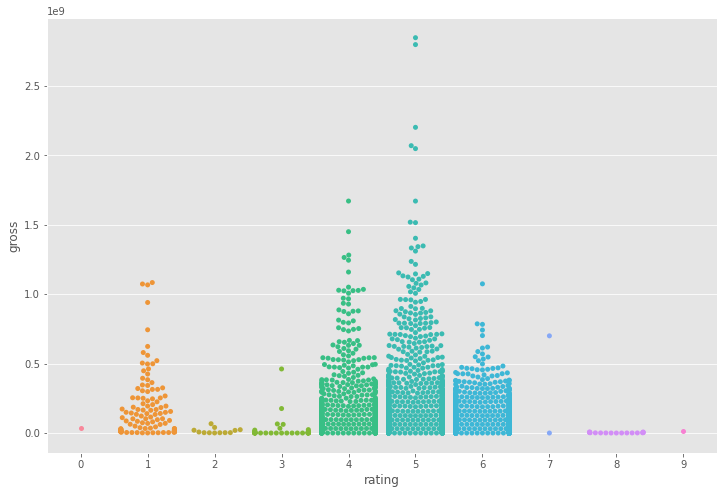

In [89]:
sns.swarmplot(x="rating", y="gross", data=df)

<AxesSubplot:xlabel='rating', ylabel='gross'>

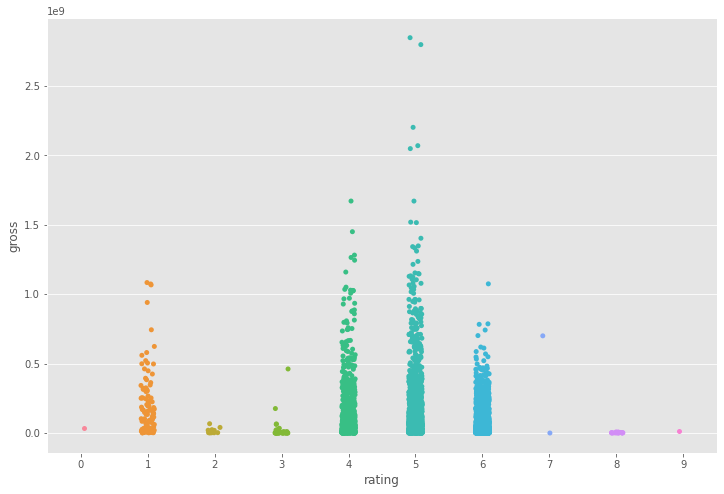

In [91]:
sns.stripplot(x="rating", y="gross", data=df)